half life: 94.73400570729176 years
half life: 473.6700285364588 years
half life: 947.3400570729176 years
half life: 1894.6801141458352 years


/Users/francis/opt/miniconda3/envs/numeric/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


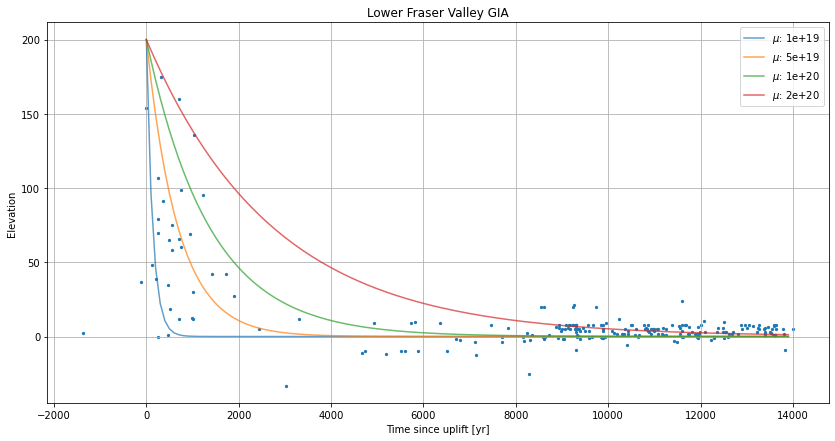

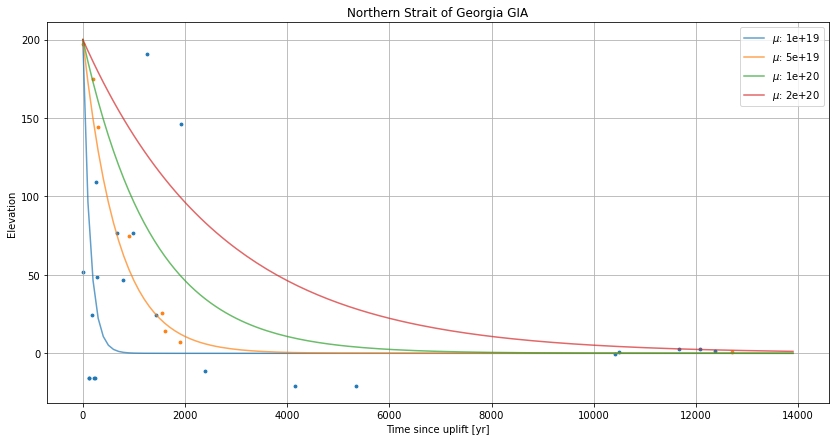

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import core
import pandas as pd

# convenience function to get the characteristic timescale constant: 
def ts_tau(mu, llambda):
    g = 9.81  # ms-2
    rho_m = 3300  # kgm-3s
    tau = (4 * np.pi * mu) / (rho_m * g * llambda)  # Turcotte and Schubert 2018
    return tau


# load the dataset: 
filename = "/Users/francis/Desktop/e543_proj/1-s2.0-S0277379114002030-mmc1.xlsx"
df = pd.read_excel(filename, index_col=24)  # index by regionls
mainland = df[df.index.str.startswith("Lower")]
ages = mainland["Median calibrated age"].to_numpy()
msl = mainland["MSL (m)"].to_numpy()

# MAINLAND VANCOUVER
llambda = 900 * 1000  # wavelength of Cordilleran ice sheet
w0 = 200  # initial height guess
mus = [1e19, 5e19, 1e20, 2e20]  # viscosities
taus = [ts_tau(mu, llambda) for mu in mus]  # get time constants
t0 = 14000  # time since uplift
ages_since = t0 - ages  # rejig times to be 'since-uplift' 
y2s = 365 * 24 * 60 * 60  # years to seconds
times = np.arange(0, t0, 100) * y2s  # time in seconds

# make a plot: 
fig, ax = plt.subplots(figsize=(14, 7))
plt.scatter(ages_since, msl, 5)

for ii, tau in enumerate(taus):
    half_life = np.log(2) * tau / 60 / 60 / 24 / 365.25
    print(f"half life: {half_life} years")
    plt.plot(
        times / y2s, w0 * np.exp(-times / tau), label=rf"$\mu$: {mus[ii]}", alpha=0.7
    )
plt.xlabel("Time since uplift [yr]")
plt.ylabel("Elevation")
plt.title("Lower Fraser Valley GIA")
plt.legend()
plt.grid()


#%% NORTH STRAIGHT OF GEORGIA
nsog = df[df.index.str.startswith("North Strait of Georgia")]
ages = nsog["Median calibrated age"].to_numpy() # get ages 
msl = nsog["MSL (m)"].to_numpy()  # get elevations

# Add core observations from Fedje (2018)
core_times = np.array([14200, 14000, 13900, 13300, 12650, 12600, 12300, 1500])
t_0 = 14200  # start of uplift
core_times_since = t_0 - core_times
core_elevations = np.array([197, 175, 144, 75, 26, 14, 7, 0.75])

ages_since = t0 - ages  # convert to ages since uplift

# make a plot
times = np.arange(0, t0, 100) * y2s
fig, ax = plt.subplots(figsize=(14, 7))
plt.scatter(ages_since[np.where(ages_since > 0)], msl[np.where(ages_since > 0)], 8)
plt.scatter(core_times_since, core_elevations, 8)

for ii, tau in enumerate(taus):
    plt.plot(
        times / y2s, w0 * np.exp(-times / tau), label=rf"$\mu$: {mus[ii]}", alpha=0.7
    )
plt.xlabel("Time since uplift [yr]")
plt.ylabel("Elevation")
plt.title("Northern Strait of Georgia GIA")
plt.legend()
plt.grid()